In [19]:
import platform

In [20]:
platform.python_version()

'3.6.5'

In [3]:
import tensorflow as tf

D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:520: Futu

In [4]:
tf.__version__

'1.7.0'

In [5]:
from tensorflow import keras

In [6]:
print(tf.VERSION)
print(keras.__version__)
print(tf.__path__)
print(keras.__path__)


1.7.0
2.1.4-tf
['D:\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow']
['D:\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\python\\keras']


In [7]:
import desc

D:\Anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Anaconda3\envs\tensorflow\lib\site-packages\scanpy\api\__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,
Using TensorFlow backend.


In [8]:
desc.run_desc_test()

Start to run a package test!
Start to process resolution= 0.1
The number of cpu in your computer is 12
Checking whether result_tmp\ae_weights.h5  exists in the directory
Pretraining time is 0.1527869701385498
...number of clusters is unknown, Initialize cluster centroid using louvain method
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
The value of delta_label of current 1 th iteration is 0.3148148148148148 >= tol 0.005
Epoch 1/5
2700/2700 [==============================] - 0s 116us/step - loss: 3.8255e-04
Epoch 2/5
2700/2700 [==============================] - 0s 22us/step - loss: 3.6694e-04
Epoch 3/5
2700/2700 [==============================] - 0s 20us/step - loss: 3.4628e-04
Epoch 4/5
2700/2700 [==============================] - 0s 19us/step - loss: 3.2485e-04
Epoch 5/5
2700/2700 [==============================] - 0s 18us/step - loss: 3.0414e-04
The value of delta_label of current 2 th

In [1]:
import desc
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
D:\Anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a futu

scanpy==1.5.1 anndata==0.7 umap==0.4.6 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.11 louvain==0.6.1


In [5]:
# load the 10X data by providing the path of the data
adata = desc.read_10X(data_path='D:\desc_data\merged')

In [6]:
adata

AnnData object with n_obs × n_vars = 12771 × 27032 
    obs: 'barcode'
    var: 'gene_ids', 'gene_symbols'

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1027: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1027: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [8]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1131: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
D:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.wa

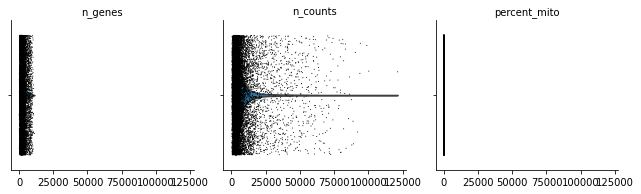

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],jitter=0.4, multi_panel=True)

In [11]:
adata = adata[adata.obs['n_genes'] < 2500, :]
adata = adata[adata.obs['percent_mito'] < 0.05, :]

D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1027: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1027: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [12]:
adata

View of AnnData object with n_obs × n_vars = 7309 × 27032 
    obs: 'barcode', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'gene_symbols', 'n_cells'

In [13]:
desc.normalize_per_cell(adata, counts_per_cell_after=1e4)
#or use
#sc.pp.normalize_per_cell(adata,counts_per_cell_after=1e4)

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.
D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1027: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [14]:
desc.log1p(adata)
#or use
#sc.pp.log1p(adata)

In [15]:
adata.raw=adata

In [16]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


D:\Anaconda3\envs\tensorflow\lib\site-packages\anndata\_core\anndata.py:1027: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [17]:
adata = adata[:, adata.var['highly_variable']]

In [18]:
adata

View of AnnData object with n_obs × n_vars = 7309 × 3235 
    obs: 'barcode', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'gene_symbols', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'

In [19]:
desc.scale(adata, zero_center=True, max_value=3)
#or use
#sc.pp.scale(adata, zero_center=True, max_value=3)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


D:\Anaconda3\envs\tensorflow\lib\site-packages\scanpy\preprocessing\_simple.py:848: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
adata = desc.train(adata, dims=[adata.shape[1], 32, 16], tol=0.005, n_neighbors=10,
                   batch_size=256, louvain_resolution=[0.8],
                   save_dir="result_human", do_tsne=True, learning_rate=300,
                   do_umap=True, num_Cores_tsne=4,
                   save_encoder_weights=True)

Start to process resolution= 0.8
The number of cpu in your computer is 12
Create the directory:result_human to save result
Checking whether result_human\ae_weights.h5  exists in the directory
The file ae_weights.h5 is not exits
Pretraining the 1th layer...
learning rate = 0.1
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/50
7309/7309 [==============================] - 2s 242us/step - loss: 0.3003
Epoch 2/50
7309/7309 [==============================] - 1s 159us/step - loss: 0.2976
Epoch 3/50
7309/7309 [==============================] - 1s 155us/step - loss: 0.2961
Epoch 4/50
7309/7309 [==============================] - 1s 157us/step - loss: 0.2948
Epoch 5/50
7309/7309 [==============================] - 1s 158us/step - loss: 0.2932
Epoch 6/50
7309/7309 [==============================] - 1s 156us/step - loss: 0.2910
Epoch 7/50
7309/7309 [==============================] - 1s 156us/step - loss: 0.2881
Epoch 8/50
7309/7309 [==============================] -

7309/7309 [==============================] - 0s 20us/step - loss: 0.1687
Epoch 12/50
7309/7309 [==============================] - 0s 15us/step - loss: 0.1606
Epoch 13/50
7309/7309 [==============================] - 0s 15us/step - loss: 0.1592
Epoch 14/50
7309/7309 [==============================] - 0s 15us/step - loss: 0.1521
Epoch 15/50
7309/7309 [==============================] - 0s 15us/step - loss: 0.1495
Epoch 16/50
7309/7309 [==============================] - 0s 16us/step - loss: 0.1543
Epoch 17/50
7309/7309 [==============================] - 0s 16us/step - loss: 0.1615
Epoch 18/50
7309/7309 [==============================] - 0s 16us/step - loss: 0.1583
Epoch 19/50
7309/7309 [==============================] - 0s 16us/step - loss: 0.1531
Epoch 20/50
7309/7309 [==============================] - 0s 15us/step - loss: 0.1579
Epoch 21/50
7309/7309 [==============================] - 0s 16us/step - loss: 0.1505
Epoch 22/50
7309/7309 [==============================] - 0s 16us/step - loss:

7309/7309 [==============================] - 1s 112us/step - loss: 0.2378
Epoch 34/50
7309/7309 [==============================] - 1s 108us/step - loss: 0.2377
Epoch 35/50
7309/7309 [==============================] - 1s 102us/step - loss: 0.2376
Epoch 36/50
7309/7309 [==============================] - 1s 106us/step - loss: 0.2375
Epoch 37/50
7309/7309 [==============================] - 1s 107us/step - loss: 0.2375
Epoch 38/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2374
Epoch 39/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2373
Epoch 40/50
7309/7309 [==============================] - 1s 101us/step - loss: 0.2373
Epoch 41/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2372
Epoch 42/50
7309/7309 [==============================] - 1s 106us/step - loss: 0.2371
Epoch 43/50
7309/7309 [==============================] - 1s 109us/step - loss: 0.2371
Epoch 44/50
7309/7309 [==============================] - 1s 107us/

7309/7309 [==============================] - 0s 52us/step - loss: 0.2362
Epoch 29/50
7309/7309 [==============================] - 0s 53us/step - loss: 0.2362
Epoch 30/50
7309/7309 [==============================] - 0s 53us/step - loss: 0.2362
Epoch 31/50
7309/7309 [==============================] - 0s 53us/step - loss: 0.2362
Epoch 32/50
7309/7309 [==============================] - 0s 52us/step - loss: 0.2362
Epoch 33/50
7309/7309 [==============================] - 0s 58us/step - loss: 0.2362
Epoch 34/50
7309/7309 [==============================] - 0s 62us/step - loss: 0.2362
Epoch 35/50
7309/7309 [==============================] - 1s 69us/step - loss: 0.2362
Epoch 36/50
7309/7309 [==============================] - 0s 62us/step - loss: 0.2362
Epoch 37/50
7309/7309 [==============================] - 0s 58us/step - loss: 0.2362
Epoch 38/50
7309/7309 [==============================] - 1s 78us/step - loss: 0.2362
Epoch 39/50
7309/7309 [==============================] - 1s 86us/step - loss:

7309/7309 [==============================] - 1s 102us/step - loss: 0.2361
Epoch 24/50
7309/7309 [==============================] - 1s 100us/step - loss: 0.2361
Epoch 25/50
7309/7309 [==============================] - 1s 102us/step - loss: 0.2361
Epoch 26/50
7309/7309 [==============================] - 1s 102us/step - loss: 0.2361
Epoch 27/50
7309/7309 [==============================] - 1s 102us/step - loss: 0.2361
Epoch 28/50
7309/7309 [==============================] - 1s 101us/step - loss: 0.2361
Epoch 29/50
7309/7309 [==============================] - 1s 104us/step - loss: 0.2361
Epoch 30/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2361
Epoch 31/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2361
Epoch 32/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2361
Epoch 33/50
7309/7309 [==============================] - 1s 103us/step - loss: 0.2361
Epoch 34/50
7309/7309 [==============================] - 1s 100us/

7309/7309 [==============================] - 0s 48us/step - loss: 0.2158
Epoch 2/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.2062
Epoch 3/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.1986
Epoch 4/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.1923
Epoch 5/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.1870
The value of delta_label of current 3 th iteration is 0.05308523737857436 >= tol 0.005
Epoch 1/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.2353
Epoch 2/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.2273
Epoch 3/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.2205
Epoch 4/5
7309/7309 [==============================] - 0s 44us/step - loss: 0.2147
Epoch 5/5
7309/7309 [==============================] - 0s 44us/step - loss: 0.2096
The value of delta_label of current 4 th iteration is 0.048980708715282525 >= tol 0.005
Epoch

7309/7309 [==============================] - 0s 44us/step - loss: 0.3330
Epoch 2/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3309
Epoch 3/5
7309/7309 [==============================] - 0s 44us/step - loss: 0.3290
Epoch 4/5
7309/7309 [==============================] - 0s 44us/step - loss: 0.3271
Epoch 5/5
7309/7309 [==============================] - 0s 44us/step - loss: 0.3254
The value of delta_label of current 19 th iteration is 0.012724038856204678 >= tol 0.005
Epoch 1/5
7309/7309 [==============================] - 0s 47us/step - loss: 0.3319
Epoch 2/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3302
Epoch 3/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3286
Epoch 4/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3270
Epoch 5/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.3256
The value of delta_label of current 20 th iteration is 0.008893145437132302 >= tol 0.005
Ep

7309/7309 [==============================] - 0s 47us/step - loss: 0.3133
Epoch 2/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3129
Epoch 3/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3125
Epoch 4/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.3122
Epoch 5/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.3118
The value of delta_label of current 35 th iteration is 0.008072239704473936 >= tol 0.005
Epoch 1/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.3126
Epoch 2/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3122
Epoch 3/5
7309/7309 [==============================] - 0s 45us/step - loss: 0.3119
Epoch 4/5
7309/7309 [==============================] - 0s 46us/step - loss: 0.3115
Epoch 5/5
7309/7309 [==============================] - 0s 47us/step - loss: 0.3111
Fine tuning encoder weights are saved to result_human/encoder_weights.h5
The value of delta

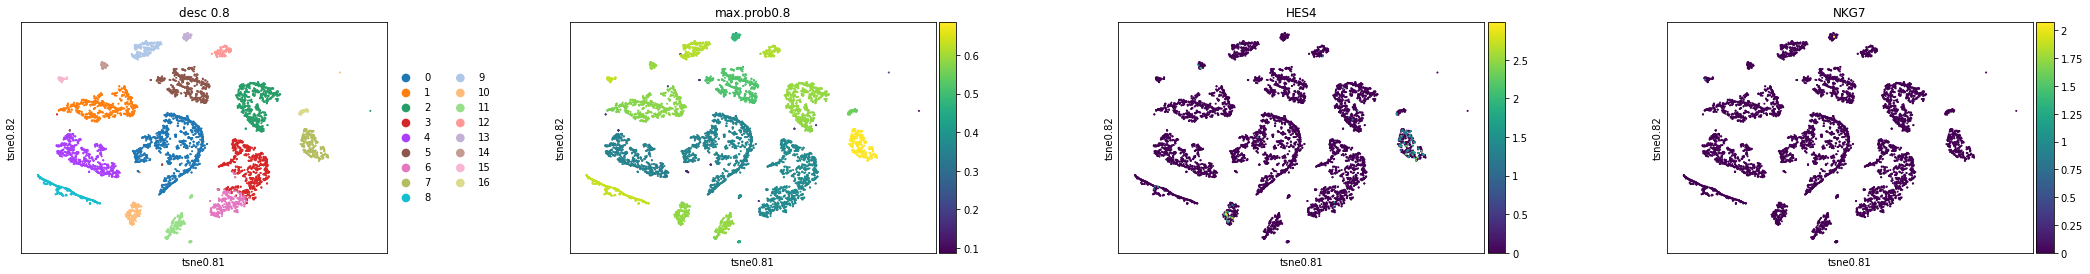

In [23]:
prob_08=adata.uns["prob_matrix0.8"]
adata.obs["max.prob0.8"]=np.max(prob_08,axis=1)
#tSNE plot 
sc.pl.scatter(adata,basis="tsne0.8",color=['desc_0.8',"max.prob0.8",'HES4', 'NKG7'])

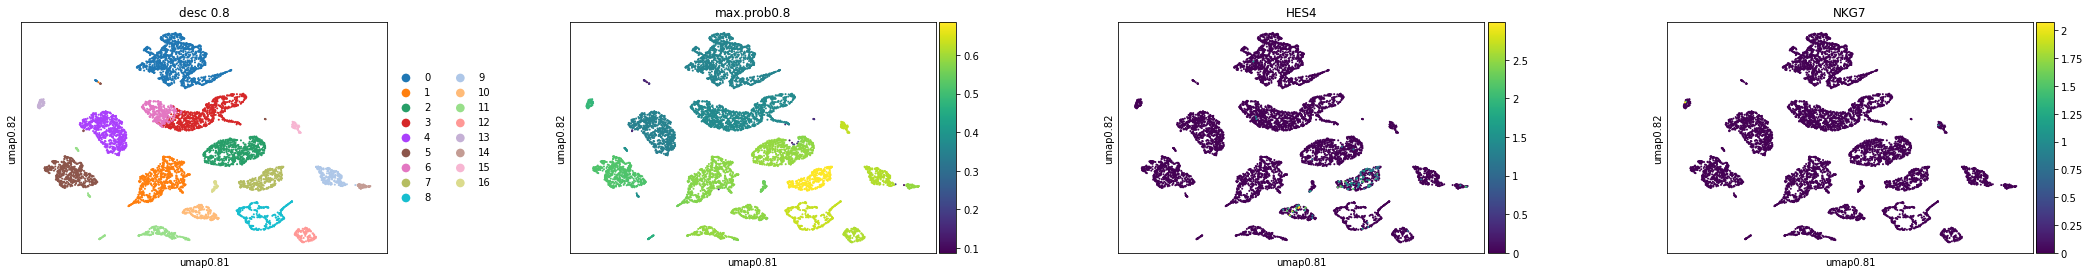

In [29]:
#Umap plot 
sc.pl.scatter(adata,basis="umap0.8",color=['desc_0.8',"max.prob0.8",'HES4', 'NKG7'])